# Нейрон
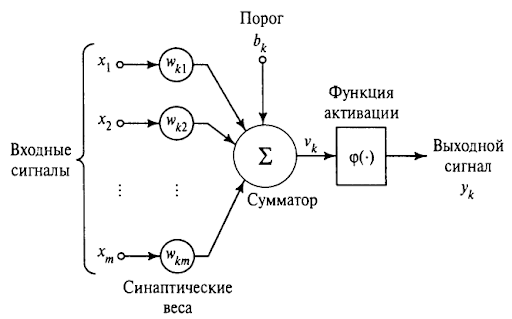

In [1]:
import numpy as np

def sigmoid(x):
    """Наша функция активации: f(x) = 1 / (1 + e^(-x))"""
    # Вычисляем сигмоиду: возвращаем значение в диапазоне (0, 1)
    return 1 / (1 + np.exp(-x))  # np.exp — экспонента от каждого элемента x

class Neuron:
    def __init__(self, weights, bias):
        """Инициализация нейрона с вектором весов и смещением (bias)."""
        self.weights = weights  # Сохраняем веса (массив длины числа входов)
        self.bias = bias        # Сохраняем смещение (скаляр)

    def feedforward(self, inputs):
        """
        Прямой проход (feedforward):
        1) Взвешиваем входы: np.dot(weights, inputs)
        2) Добавляем смещение: + bias
        3) Пропускаем через функцию активации sigmoid
        """
        total = np.dot(self.weights, inputs) + self.bias
        # np.dot — скалярное произведение векторов weights и inputs
        return sigmoid(total)
        # Передаём результат через sigmoid и возвращаем активацию нейрона

# Пример задания параметров нейрона
weights = np.array([0, 1])  # Вектор весов: w₁ = 0, w₂ = 1
bias = 4                    # Смещение: b = 4

# Создаём экземпляр класса Neuron с указанными weights и bias
n = Neuron(weights, bias)

# Задаём входной вектор для нейрона
x = np.array([2, 3])        # Два входа: x₁ = 2, x₂ = 3

# Вызываем метод feedforward и выводим результат
print(f'Выходное значение нейрона: {n.feedforward(x).round(3)}')     # Ожидаемое значение ≈ sigmoid(0*2 + 1*3 + 4) ≈ 0.999

Выходное значение нейрона: 0.999


# Простая нейронная сесть
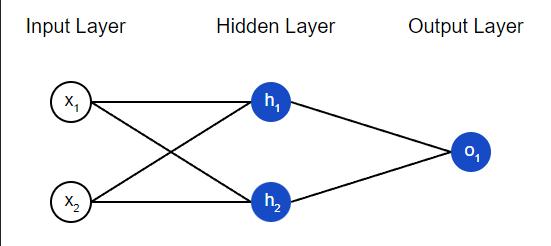

In [2]:
class OurNeuralNetwork:
    '''
    Нейронная сеть с:
    - 2 входами
    - скрытым слоем с 2 нейронами (h1, h2)
    - выходным слоем с 1 нейроном (o1)
    Каждый нейрон имеет одинаковые веса и смещение:
    - w = [0, 1]
    - b = 0
    '''
    def __init__(self):
        # Задаём общий вектор весов и смещение для всех нейронов
        weights = np.array([0, 1])  # w1 = 0, w2 = 1
        bias = 0                     # b = 0

        # Создаём нейроны скрытого слоя h1 и h2
        # класс Neuron из предыдущего примера
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        # Создаём выходной нейрон o1
        self.o1 = Neuron(weights, bias)

    def feedforward(self, x):
        """
        Прямой проход по сети:
        1) Получаем выходы скрытого слоя h1 и h2
        2) Передаём их как входы в выходной нейрон o1
        3) Возвращаем итоговую активацию o1
        """
        # Вычисляем активацию первого скрытого нейрона
        out_h1 = self.h1.feedforward(x)
        # Вычисляем активацию второго скрытого нейрона
        out_h2 = self.h2.feedforward(x)

        # Формируем вход для выходного нейрона из выходов скрытого слоя
        inputs_o1 = np.array([out_h1, out_h2])
        # Вычисляем активацию выходного нейрона
        out_o1 = self.o1.feedforward(inputs_o1)

        return out_o1  # Возвращаем финальное значение сети

# Пример использования:
network = OurNeuralNetwork()      # Создаём объект сети
x = np.array([2, 3])              # Входной вектор x1=2, x2=3
print(f'Выходное значение нейронной сети: {network.feedforward(x).round(3)}')  # 0.7216325609518421

Выходное значение нейронной сети: 0.722


Исходные данные

| Имя       | вес(фунты) | рост(дюймы) | пол |
|-----------|------------|-------------|-----|
| Элизабет  | 133        | 65          | Ж   |
| Джена     | 120        | 60          | Ж   |
| Кларк     | 160        | 72          | М   |
| Кент      | 152        | 70          | М   |

Преобразованные данные

| Имя       | вес(фунты) | рост(дюймы) | пол |
|-----------|------------|-------------|-----|
| Элизабет  | -2         | -1          | 1   |
| Джена     | -15        | -6          | 1   |
| Кларк     | 25         | 6           | 0   |
| Кент      | 17         | 4           | 0   |

Функция потерь
$\mathrm{MSE} = \frac{1}{n}\sum_{i=1}^{n}\bigl(y_{\text{true},i} - y_{\text{pred},i}\bigr)^{2}$


- $n$ — количество образцов (в нашем примере 4: Элизабет, Джена, Кларк, Кент).  
- $y$ — целевая переменная, которую нужно предсказать (пол).  
- $y_{\text{true}}$ — истинное значение переменной (например, для Элизабет $$1$$ означает «женщина»).  
- $y_{\text{pred}}$ — предсказанное сетью значение переменной.  
- $(y_{\text{true}} - y_{\text{pred}})^2$ — квадратичная ошибка для одного образца.  
- $\displaystyle \mathrm{MSE} = \frac{1}{n}\sum_{i=1}^{n}\bigl(y_{\text{true},i} - y_{\text{pred},i}\bigr)^{2}$ — средняя квадратичная ошибка по всем образцам; чем меньше MSE, тем точнее предсказания.  


In [3]:
import numpy as np

def mse_loss(y_true, y_pred):
    """y_true и y_pred — массивы NumPy одинаковой длины."""
    # Вычисляем поэлементные квадраты ошибок: (y_true - y_pred)^2
    squared_errors = (y_true - y_pred) ** 2
    # Берём среднее значение этих квадратов: MSE
    return squared_errors.mean()

# Пример истинных меток (1 = женщина, 0 = мужчина)
y_true = np.array([1, 0, 0, 1])
# Пример предсказаний модели
y_pred = np.array([0, 0, 0, 0])

print(f'MSE: {mse_loss(y_true, y_pred)}')  # 0.5

MSE: 0.5


In [4]:
def sigmoid(x):
    """Сигмоидная функция активации: f(x) = 1 / (1 + e^(-x))"""
    return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
    """Производная сигмоиды: f'(x) = f(x) * (1 - f(x))"""
    fx = sigmoid(x)
    return fx * (1 - fx)

def mse_loss(y_true, y_pred):
    """y_true и y_pred — массивы NumPy одинаковой длины."""
    return ((y_true - y_pred) ** 2).mean()

class OurNeuralNetwork:
    """
    Нейронная сеть с:
    - 2 входами
    - скрытым слоем из 2 нейронов (h1, h2)
    - выходным слоем из 1 нейрона (o1)
    """
    def __init__(self):
        # Инициализируем веса случайными значениями из нормального распределения
        self.w1 = np.random.normal()  # вес h1 для x[0]
        self.w2 = np.random.normal()  # вес h1 для x[1]
        self.w3 = np.random.normal()  # вес h2 для x[0]
        self.w4 = np.random.normal()  # вес h2 для x[1]
        self.w5 = np.random.normal()  # вес o1 для h1
        self.w6 = np.random.normal()  # вес o1 для h2

        # Инициализируем смещения
        self.b1 = np.random.normal()  # смещение для h1
        self.b2 = np.random.normal()  # смещение для h2
        self.b3 = np.random.normal()  # смещение для o1

        # Список для хранения потерь по эпохам
        self.losses = []

    def feedforward(self, x):
        # Прямой проход: вычисляем активации скрытого и выходного нейронов
        sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
        h1 = sigmoid(sum_h1)

        sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
        h2 = sigmoid(sum_h2)

        sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
        o1 = sigmoid(sum_o1)

        return o1

    def train(self, data, all_y_trues):
        """
        - data — NumPy массив формы (n, 2), где n — число примеров
        - all_y_trues — NumPy массив истинных меток длины n
        """
        learn_rate = 0.1
        epochs = 1000

        for epoch in range(epochs):
            for x, y_true in zip(data, all_y_trues):
                # --- Forward pass ---
                sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
                h1 = sigmoid(sum_h1)

                sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
                h2 = sigmoid(sum_h2)

                sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
                o1 = sigmoid(sum_o1)
                y_pred = o1

                # --- Backpropagation (расчёт градиентов) ---
                d_L_d_ypred = -2 * (y_true - y_pred)

                # Градиенты для o1
                d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
                d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
                d_ypred_d_b3 = deriv_sigmoid(sum_o1)
                d_ypred_d_h1 = self.w5 * deriv_sigmoid(sum_o1)
                d_ypred_d_h2 = self.w6 * deriv_sigmoid(sum_o1)

                # Градиенты для h1
                d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
                d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
                d_h1_d_b1 = deriv_sigmoid(sum_h1)

                # Градиенты для h2
                d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
                d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2)
                d_h2_d_b2 = deriv_sigmoid(sum_h2)

                # --- Обновление весов и смещений ---
                # h1
                self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
                self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
                self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1
                # h2
                self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
                self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
                self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2
                # o1
                self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
                self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
                self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3

            # --- После каждой эпохи вычисляем и сохраняем общую MSE ---
            y_preds = np.apply_along_axis(self.feedforward, 1, data)
            loss = mse_loss(all_y_trues, y_preds)
            self.losses.append(loss)

            if epoch % 100 == 0:
                print(f"Эпоха {epoch}, потери: {loss:.3f}")

# --- Подготовка данных ---
data = np.array([
    [-2, -1],  # Алиса
    [25, 6],   # Боб
    [17, 4],   # Чарли
    [-15, -6], # Диана
])
all_y_trues = np.array([1, 0, 0, 1])  # 1=Ж, 0=М

# --- Обучение сети ---
network = OurNeuralNetwork()
network.train(data, all_y_trues)

# --- Примеры предсказаний ---
emily = np.array([-7, -3])  # Эмили
frank = np.array([20, 2])   # Фрэнк
print("Эмили:", network.feedforward(emily))  # ~0.96 → 1 (Ж)
print("Фрэнк:", network.feedforward(frank))  # ~0.04 → 0 (М)

Эпоха 0, потери: 0.236
Эпоха 100, потери: 0.011
Эпоха 200, потери: 0.006
Эпоха 300, потери: 0.004
Эпоха 400, потери: 0.003
Эпоха 500, потери: 0.003
Эпоха 600, потери: 0.002
Эпоха 700, потери: 0.002
Эпоха 800, потери: 0.002
Эпоха 900, потери: 0.002
Эмили: 0.9670336676451717
Фрэнк: 0.03702146469382574


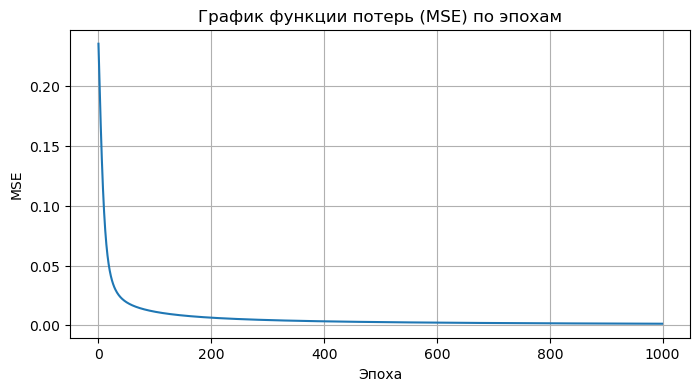

In [5]:
import matplotlib.pyplot as plt


# --- Построение графика функции потерь ---
plt.figure(figsize=(8, 4))
plt.plot(network.losses)
plt.title("График функции потерь (MSE) по эпохам")
plt.xlabel("Эпоха")
plt.ylabel("MSE")
plt.grid(True)
plt.show()